# Stellar Fusion:
### In this notebook, we will see the need to use different units for particles when understanding the process of fusion. 


Let's first deal with the protons, electrons and neutrons of a particle. Since the number is so small, it's best to introduce a new unit, atomic mass unit *u*, to make these extremely small numbers easier to work with

In [1]:
import numpy as np
from numpy.random import default_rng
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc
from IPython.display import Image
%matplotlib inline

In [3]:
proton_mass = 1.6726219236951*10**(-27) #kg
atomic_mass_unit = 1.66054*10**(-27) #kg
proton_amu = proton_mass/atomic_mass_unit

print("Proton's Mass in atomic mass units is ", proton_amu)

Proton's Mass in atomic mass units is  1.00727590042703


 We can calculate the rest energy of proton using E = mc^2

In [11]:
c = 299792458 # m/s
proton_energy = proton_mass*c**2

#Convert this to eV to make it easier to work with

eV = 1.602176634*10**(-19) # Joules
proton_eV = proton_energy/eV

print("Proton's rest energy in Joules is ", proton_energy, "J")
print("Proton's rest energy in eV is ", proton_eV, "eV")
print(" or ", proton_eV/1000000, "MeV")

Proton's rest energy in Joules is  1.5032776159897095e-10 J
Proton's rest energy in eV is  938272088.1633513 eV
 or  938.2720881633513 MeV


## 1 amu = 931.494 MeV/c^2

In [14]:
amu = 931.494 #MeV/c^2

Let's do the same for neutron and electron:

In [16]:
neutron_mass = 1.6749274980495*10**(-27)/atomic_mass_unit
neutron_eV = neutron_mass*amu
print("neutron's rest energy is ", neutron_eV, "MeV")

electron_mass = 9.109383701528*10**(-31)/atomic_mass_unit
electron_eV = electron_mass * amu
print("electron's rest energy is ", electron_eV, "MeV")

neutron's rest energy is  939.564789085551 MeV
electron's rest energy is  0.5109986065780484 MeV


Electron's rest energy is much lower than that of proton's and neutron's.

## Mass Excess

Mass excess is simply the difference between actual mass and mass number. Let's calculate the mass excess of a hydrogen atom by subtracting it's Mass Number(A = 1) and its actual mass (m = 1.007825)

In [19]:
h_excess = 1.007825 - 1
print("Mass excess of 1H atom is ", h_excess, "u")
print("In kilo electron volts, it is ", h_excess * amu*1000, "keV")

Mass excess of 1H atom is  0.007824999999999971 u
In kilo electron volts, it is  7288.940549999973 keV


In [20]:
deltaM_He = 4.002603-4
print(f"Mass excess for 4He atom: {deltaM_He} u")

Mass excess for 4He atom: 0.002602999999999689 u


## Mass Defect

Mass defect is the difference between actual mass and the sum of all masses of all particles making up the atom. 
* Stable nuclei have a negative mass defect

In [25]:
deltaM_defect_He = 4.002603 - 2*(proton_amu+electron_mass) - (4-2)*neutron_mass
print(f"Mass defect for 4He atom: {deltaM_defect_He} u")

Mass defect for 4He atom: -0.03037465800854333 u


## Binding Energy

***Nuclear binding energy*** is the energy that is needed to break a nucleus into protons and neutrons. ***Electron binding energy*** is the energy needed to break one specific electron free from the entire atom (aka ionisation energy). ***Atomic binding energy*** is the energy need to break ALL the elecrons from an atom. 

Our previously calculated mass defect can be used to calculate the binding energy. It is usually quoted per nucleon so divide the energy by the nucleon number of the given atom.

In [29]:
BE_He = abs(deltaM_defect_He*amu) 
print(f"Binding Energy for 4He nucleus: {BE_He} MeV")

#nucleon number of He is 4
BE_He_perA = BE_He/4
print(f"Binding Energy per Nucleon for 4He nucleus: {BE_He_perA} MeV")

Binding Energy for 4He nucleus: 28.293811687010063 MeV
Binding Energy per Nucleon for 4He nucleus: 7.073452921752516 MeV


In [31]:
import pandas as pd
df = pd.read_csv('/kaggle/input/atomic-mass-data-center/mass16Abundant.csv')

df.head()

,N-Z,N,Z,A,EL,MASS EXCESS (keV),MASS EXCESS ERROR (keV),BINDING ENERGY (keV),BINDING ENERGY ERROR (keV),ATOMIC MASS (u),ATOMIC MASS ERROR(u)
0,-1,0,1,1,H,7288.97061,0.00009,0.000,0.000,1.007825,9.000000e-11
1,0,2,2,4,He,2424.91561,0.00006,7073.915,0.000,4.002603,6.000000e-11
2,1,4,3,7,Li,14907.10529,0.00423,5606.439,0.001,7.016003,4.540000e-09
3,1,5,4,9,Be,11348.45300,0.07700,6462.668,0.009,9.012183,8.200000e-08
4,1,6,5,11,B,8667.70700,0.01200,6927.732,0.001,11.009305,1.300000e-08


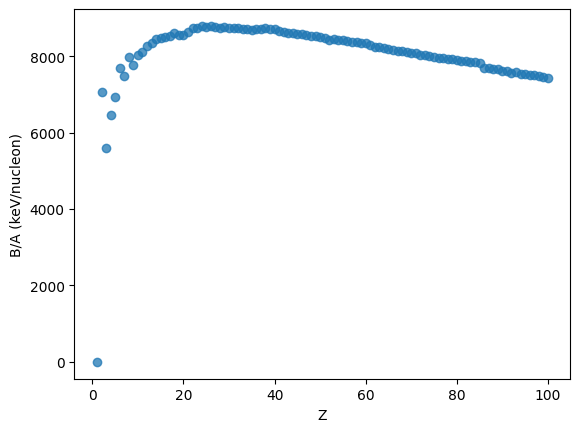

In [32]:
fig = plt.figure(1)
plt.xlabel("Z")
plt.ylabel("B/A (keV/nucleon)")
plt.scatter(df["Z"], df["BINDING ENERGY (keV)"], marker='o', alpha=0.75)

In [35]:
df["BINDING ENERGY (keV)"]

0        0.000
1     7073.915
2     5606.439
3     6462.668
4     6927.732
        ...   
95    7501.931
96    7498.940
97    7470.500
98    7457.242
99    7422.194
Name: BINDING ENERGY (keV), Length: 100, dtype: float64

## Stellar Fusion

Our sun's fusion reaction is called proton-proton fusion, where two hydrogen atoms collide and fuse to become one helium atom. 

1. Two protons combine, one turns into a neutron to form deuterium
2. Deuterium combines with another proton to form helium-3
3. Two helium-3 nuclei combine to form helium-4, releasing two protons

**Q Value**: if Q>0, energy is released. If Q < 0, energy is used

In [37]:
me = 511 # keV
Q = 4*df["MASS EXCESS (keV)"][0] - df["MASS EXCESS (keV)"][1] - 4*me
Q /= 1000
print(f"Q = {round(Q,3)} MeV per reaction")

Q = 24.687 MeV per reaction


In some cases, two positrons annihilate with two electrons in the plasma. This results in extra 4me of energy produces. The new Q is:

In [38]:
Q = 4*df["MASS EXCESS (keV)"][0] - df["MASS EXCESS (keV)"][1]
Q /= 1000
print(f"Q = {round(Q,3)} MeV")

Q = 26.731 MeV


Let's calculate the total energy the Sun has and how many years the hydrogen fusion will continue:

In [39]:
mSun = 1.989*10**30  # kg
Enuclear = 0.007*(0.1*mSun)*c**2  # J
print(f"Total Energy from fusing Hydrogen in the Sun = {Enuclear:.2e} J")

Lsun = 3.828*10**26 # W (J/s)

#total energy divided by the energy radiated per second by the Sun (luminosity)
tnuclear = Enuclear/Lsun         
print(f"Sun's Hydrogen fusing lifetime = {tnuclear/3600/24/365.25:.1e} years")

Total Energy from fusing Hydrogen in the Sun = 1.25e+44 J
Sun's Hydrogen fusing lifetime = 1.0e+10 years


This means the sun will continue to live for another 5.4 billion years (since it's 4.6 billion years old and has a total of 10 billion years on the main sequence)